In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as influence_plot


In [164]:
data = pd.read_csv(r"C:\Users\user\Downloads\UN initiative report for sustainable development.csv")

In [165]:
data

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,FIN,Finland,OECD,86.760595,99.5750,60.886750,95.386385,97.169333,92.11125,94.3276,...,86.789000,95.995714,98.4685,91.233750,60.059571,68.793667,87.928000,85.0700,92.521091,75.601000
1,SWE,Sweden,OECD,85.981397,98.8885,63.074125,96.904000,99.761667,91.44025,95.0576,...,84.966429,97.586286,94.9650,90.389250,56.830571,70.031000,69.348667,80.1882,88.508455,85.770250
2,DNK,Denmark,OECD,85.683637,99.2155,71.025250,95.398500,99.339667,86.99800,90.7316,...,87.562429,96.984857,98.1560,93.038500,44.571714,60.780667,76.303333,92.7924,93.844909,82.148000
3,DEU,Germany,OECD,83.358447,99.5105,72.366000,93.039357,97.162667,81.92025,88.4434,...,86.967286,95.788429,88.1470,90.096500,55.412857,64.002000,73.996000,79.2318,89.457545,84.390250
4,AUT,Austria,OECD,82.280189,99.4510,73.067500,92.468000,97.914333,84.57925,92.1636,...,83.274143,96.982143,94.6345,92.473667,49.623286,57.332000,NaN,73.5836,87.911455,71.130250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,SOM,Somalia,Sub-Saharan Africa,48.027231,11.2740,27.306833,17.860923,55.639000,25.86100,49.3006,...,55.669500,5.599857,73.8030,69.417667,94.129000,99.925333,50.251200,53.3714,40.012200,43.725667
162,YEM,"Yemen, Rep.",MENA,46.846980,4.5525,28.769714,44.467429,41.766750,13.05475,36.2314,...,53.237800,14.223714,66.2925,52.952750,95.959143,98.667000,74.936667,48.3705,35.905714,50.094333
163,TCD,Chad,Sub-Saharan Africa,45.342321,25.4270,38.534714,27.061071,13.307750,30.83550,42.4036,...,64.424333,9.631571,63.0405,32.822250,90.994167,99.079000,NaN,76.1944,29.438000,52.594000
164,CAF,Central African Republic,Sub-Saharan Africa,40.395839,3.1820,36.468000,12.952714,19.305750,34.20075,40.4204,...,53.382333,7.064714,9.5775,21.898667,94.462143,99.463333,NaN,89.7172,42.332667,36.516750


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   166 non-null    object 
 1   country        166 non-null    object 
 2   region         166 non-null    object 
 3   overall_score  166 non-null    float64
 4   goal_1_score   151 non-null    float64
 5   goal_2_score   166 non-null    float64
 6   goal_3_score   166 non-null    float64
 7   goal_4_score   166 non-null    float64
 8   goal_5_score   166 non-null    float64
 9   goal_6_score   166 non-null    float64
 10  goal_7_score   166 non-null    float64
 11  goal_8_score   166 non-null    float64
 12  goal_9_score   166 non-null    float64
 13  goal_10_score  149 non-null    float64
 14  goal_11_score  166 non-null    float64
 15  goal_12_score  166 non-null    float64
 16  goal_13_score  166 non-null    float64
 17  goal_14_score  126 non-null    float64
 18  goal_15_sc

In [167]:
data.describe()

,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,166.000000,151.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,149.000000,166.000000,166.000000,166.000000,126.000000,166.000000,166.000000,166.000000
mean,67.549197,75.234401,59.799100,69.694078,76.512968,63.285420,66.710744,61.413598,71.952935,51.600648,62.917889,72.181106,79.775904,82.119387,65.494968,66.637486,61.546404,60.954819
std,10.295499,31.169948,10.620853,20.354575,23.181919,16.399691,14.091641,20.364351,10.592308,26.561680,27.348955,18.215526,16.092924,21.175602,11.475977,14.175602,15.517449,12.991856
min,38.676086,0.000000,19.805800,12.952714,1.232250,13.054750,32.600000,8.697000,39.535000,1.654833,0.000000,13.826250,37.729429,0.000000,36.579400,26.477500,29.438000,29.350000
25%,60.547488,55.779250,54.007188,51.860089,61.417938,51.046250,55.237250,47.521312,66.426857,30.206464,41.608000,59.969813,68.592464,72.543000,57.647625,56.606900,49.029477,50.854917
50%,69.376528,93.300500,61.027500,75.437629,84.772875,65.869875,67.878000,68.612750,73.157643,48.168798,69.700500,76.851500,84.566024,90.903000,65.412250,66.295700,60.908687,60.805000
75%,74.947511,98.950750,67.264335,85.524428,95.644063,76.137000,76.044200,74.364000,79.626036,74.713036,84.612500,86.499437,94.084750,96.710875,72.992375,76.585000,73.716061,71.647188
max,86.760595,100.000000,83.401125,97.115143,99.761667,94.021667,95.057600,99.550750,93.382750,99.128857,100.000000,99.858000,98.811200,99.925333,90.394750,97.849000,93.844909,94.026500


In [168]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_18436\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
overall_score,1.000000,0.879689,0.639615,0.910756,0.858077,0.663755,0.861149,0.863497,0.737502,0.856691,0.536496,0.821144,-0.694635,-0.455556,0.091561,0.236955,0.831594,0.628118
goal_1_score,0.879689,1.000000,0.537800,0.860447,0.783069,0.429570,0.742359,0.786611,0.615130,0.767125,0.513901,0.722504,-0.638526,-0.549352,-0.104572,0.062049,0.692300,0.545455
goal_2_score,0.639615,0.537800,1.000000,0.550486,0.546783,0.451962,0.547459,0.474698,0.584945,0.563492,0.243608,0.500454,-0.323319,-0.253676,0.051127,0.072371,0.436229,0.261801
goal_3_score,0.910756,0.860447,0.550486,1.000000,0.826309,0.595651,0.763701,0.843806,0.684982,0.869853,0.471278,0.804826,-0.780412,-0.613241,-0.069683,0.067842,0.803785,0.541696
goal_4_score,0.858077,0.783069,0.546783,0.826309,1.000000,0.614024,0.717833,0.788133,0.610886,0.754960,0.333083,0.755974,-0.618713,-0.482285,-0.055238,0.038193,0.669632,0.482211
goal_5_score,0.663755,0.429570,0.451962,0.595651,0.614024,1.000000,0.632665,0.572943,0.554895,0.584823,0.099902,0.665232,-0.581224,-0.364018,0.036513,0.195211,0.589914,0.434028
goal_6_score,0.861149,0.742359,0.547459,0.763701,0.717833,0.632665,1.000000,0.731832,0.670214,0.743420,0.375933,0.699531,-0.605259,-0.369852,0.030156,0.214874,0.678127,0.549485
goal_7_score,0.863497,0.786611,0.474698,0.843806,0.788133,0.572943,0.731832,1.000000,0.569953,0.731546,0.347718,0.776578,-0.632188,-0.418153,-0.005863,0.052403,0.679100,0.530657
goal_8_score,0.737502,0.615130,0.584945,0.684982,0.610886,0.554895,0.670214,0.569953,1.000000,0.675758,0.381008,0.567912,-0.576135,-0.447093,0.054247,0.190013,0.587837,0.417095
goal_9_score,0.856691,0.767125,0.563492,0.869853,0.754960,0.584823,0.743420,0.731546,0.675758,1.000000,0.460642,0.719808,-0.827921,-0.659626,-0.007956,0.104472,0.801500,0.472068


In [169]:
import seaborn as sn
import matplotlib.pyplot as plt


C:\Users\user\AppData\Local\Temp\ipykernel_18436\2477084109.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr() , annot = True)


<Axes: >

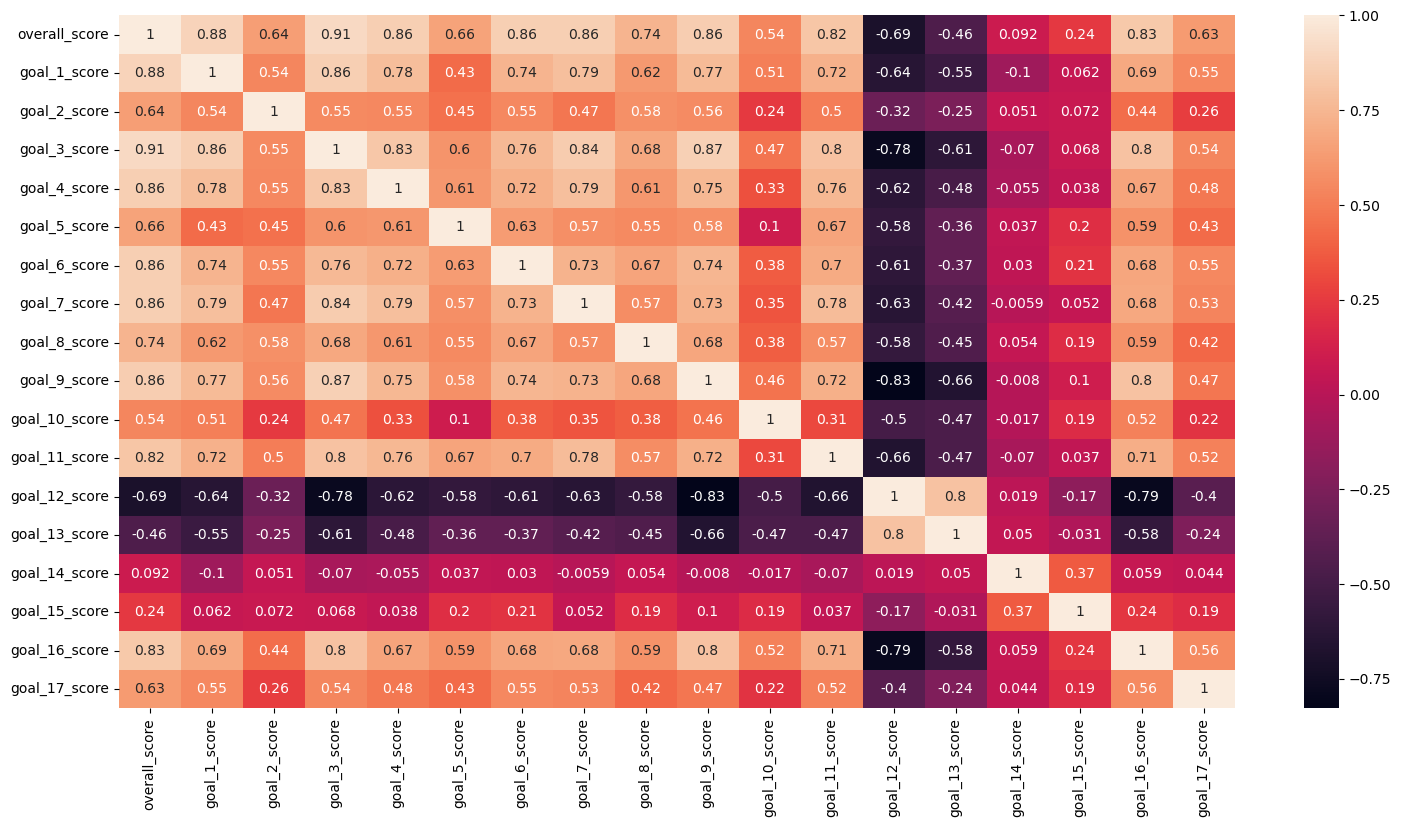

In [170]:
plt.figure(figsize = (18,9))
sn.heatmap(data.corr() , annot = True)

In [171]:
data.head(2)

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,FIN,Finland,OECD,86.760595,99.5750,60.886750,95.386385,97.169333,92.11125,94.3276,...,86.789000,95.995714,98.4685,91.23375,60.059571,68.793667,87.928000,85.0700,92.521091,75.60100
1,SWE,Sweden,OECD,85.981397,98.8885,63.074125,96.904000,99.761667,91.44025,95.0576,...,84.966429,97.586286,94.9650,90.38925,56.830571,70.031000,69.348667,80.1882,88.508455,85.77025


In [172]:
data['overall_score'].value_counts()

86.760595    1
64.792645    1
64.599983    1
64.433993    1
64.281673    1
            ..
72.877044    1
72.503497    1
72.491664    1
72.469017    1
38.676086    1
Name: overall_score, Length: 166, dtype: int64

In [173]:
data.duplicated().any()

False

In [174]:
data['country_code'].duplicated().any()

False

{'whiskers': [<matplotlib.lines.Line2D at 0x20692051030>,
 'caps': [<matplotlib.lines.Line2D at 0x20692051570>,
 'boxes': [<matplotlib.lines.Line2D at 0x20692050d90>],
 'medians': [<matplotlib.lines.Line2D at 0x20692051ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20692051d50>],
 'means': []}

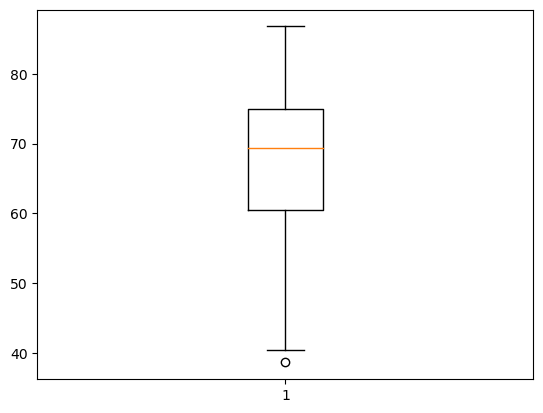

In [175]:
plt.boxplot(data['overall_score'])

C:\Users\user\AppData\Local\Temp\ipykernel_18436\3571471360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['overall_score'] , color = 'red')


<Axes: xlabel='overall_score', ylabel='Density'>

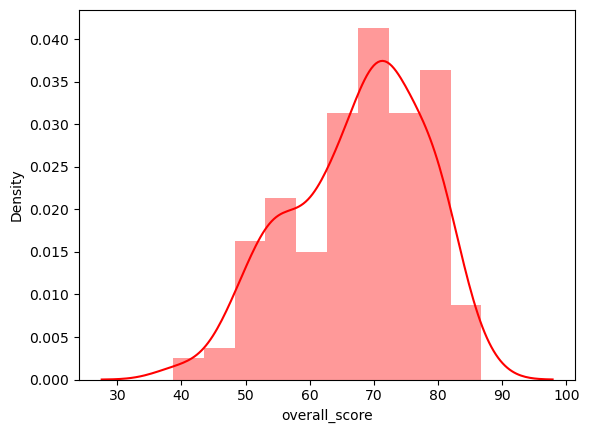

In [176]:
sn.distplot(data['overall_score'] , color = 'red')

<Axes: xlabel='overall_score', ylabel='goal_1_score'>

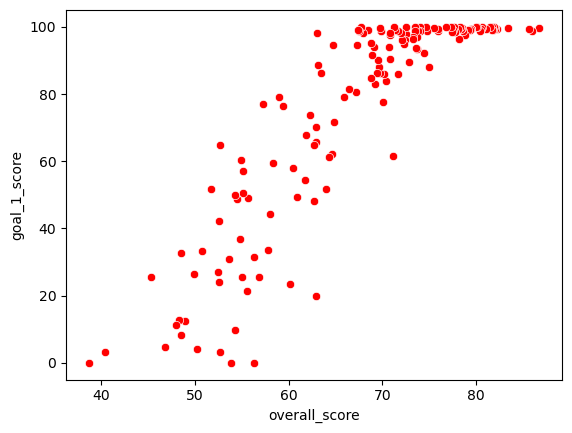

In [177]:
sn.scatterplot(x = 'overall_score' , y = 'goal_1_score' , data = data , color = 'red')

<Axes: xlabel='region', ylabel='overall_score'>

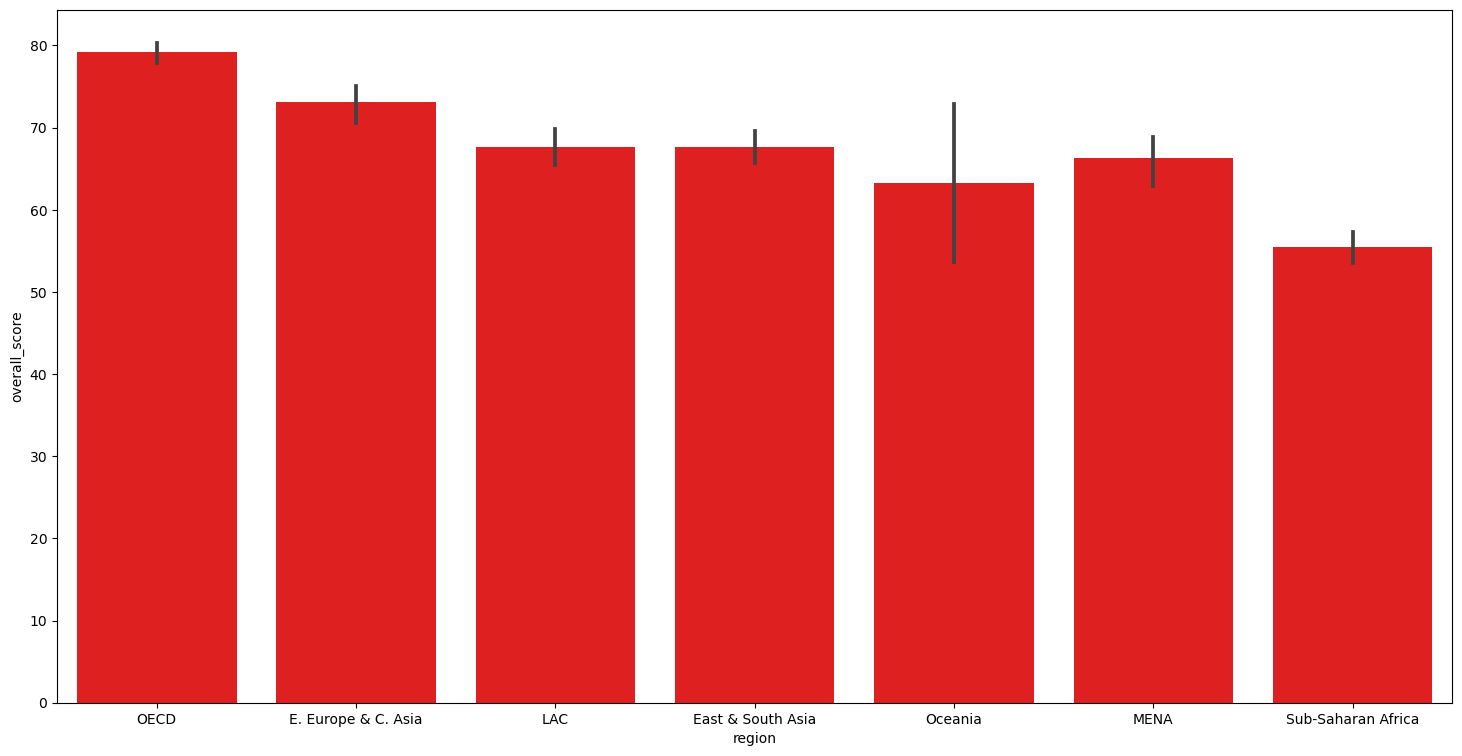

In [178]:
plt.figure(figsize = (18,9))
sn.barplot(x = 'region' , y = 'overall_score' , data = data , color = 'red')

In [179]:
x = data.drop(['overall_score'] , axis =1 )
y = data['overall_score']

In [180]:
le = LabelEncoder()
x_encoded = x.apply(le.fit_transform)

In [181]:
x_encoded

,country_code,country,region,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,52,54,4,128,80,157,133,163,163,161,156,158,134,152,27,32,124,147,163,142
1,143,143,4,107,95,164,165,162,165,163,149,163,129,144,22,36,74,135,157,162
2,44,44,4,116,147,158,157,157,160,158,161,160,133,158,3,23,102,159,165,157
3,42,59,4,127,153,146,132,142,154,135,158,157,115,143,19,26,96,130,159,159
4,7,7,4,123,156,143,140,151,161,156,139,159,128,155,10,19,126,113,156,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,136,136,6,7,2,1,32,1,17,35,15,1,82,57,123,165,16,29,11,13
162,162,163,3,4,3,23,16,0,1,24,8,15,67,29,144,143,99,14,4,36
163,146,31,6,15,7,4,3,3,5,0,31,4,62,5,111,151,126,122,0,51
164,26,30,6,2,6,0,4,8,3,8,10,2,3,1,127,160,126,156,19,3


In [182]:
y.head(10)

0    86.760595
1    85.981397
2    85.683637
3    83.358447
4    82.280189
5    82.048343
6    82.004489
7    81.874552
8    81.800176
9    81.683346
Name: overall_score, dtype: float64

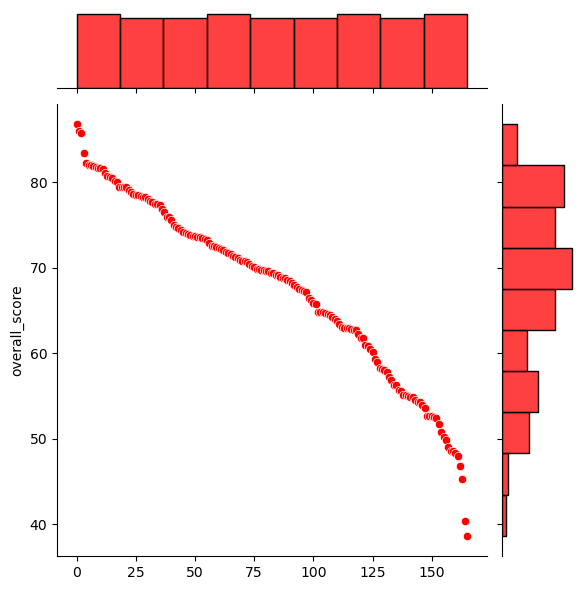

In [183]:
sn.jointplot(data['overall_score'] , color = 'red')

In [184]:
x_train , x_test , y_train , y_test = train_test_split(x_encoded , y  , test_size = 0.20 , random_state = 42)

In [185]:
x_train.shape , x_test.shape

((132, 20), (34, 20))

In [186]:
model = LinearRegression()

In [187]:
model.fit(x_train , y_train)

LinearRegression()

In [188]:
y_pred = model.predict(x_test)

In [189]:
y_pred

array([64.25144958, 54.09275148, 68.10958136, 69.77046981, 66.30537995,
       79.75246337, 62.32258519, 66.96082757, 49.99189044, 61.95651089,
       81.50005283, 75.72491082, 80.07462944, 69.58306141, 78.86182454,
       78.35194101, 59.6789351 , 75.99525049, 70.76892351, 80.90800675,
       67.12231689, 78.87006109, 80.40296714, 81.07046888, 52.32688425,
       73.19943983, 55.81912931, 72.97494346, 71.26039174, 54.48467043,
       77.12080269, 54.77093649, 58.55391302, 66.66223026])

In [190]:
data_new = pd.DataFrame({'actual':y_test , 'predicted': y_pred})

In [191]:
data_new

,actual,predicted
100,65.910951,64.251450
136,55.669402,54.092751
78,69.714766,68.109581
56,72.877044,69.770470
97,67.143682,66.305380
29,78.223771,79.752463
104,64.792645,62.322585
82,69.401499,66.960828
162,46.846980,49.991890
108,64.281673,61.956511


<Axes: xlabel='actual', ylabel='predicted'>

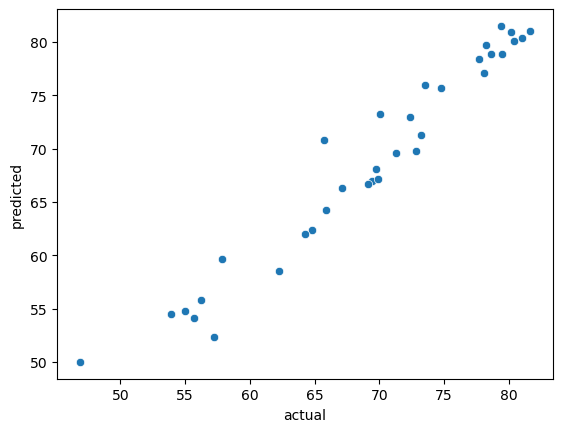

In [192]:
sn.scatterplot(x = 'actual' , y = 'predicted' , data = data_new)

In [193]:
model_1 = smf.ols("y~x_encoded" , data = data).fit()

In [194]:
model_1

In [195]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           4.91e-97
Time:                        22:42:17   Log-Likelihood:                -338.41
No. Observations:                 166   AIC:                             718.8
Df Residuals:                     145   BIC:                             784.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.9109      1.831     19.617      0.000      32.293      39.529
x_encoded[0]      0.0023      0.007      0.320      0.749      -0.012       0.017
x_encoded[1]    3.73e-05      0.007      0.005      0.996      -0.014       0.014
x_encoded[2]     -0.4450      0.100     -4.442      0.000      -0.643      -0.247
x_encoded[3]      0.0308      0.009      3.520      0.001       0.014       0.048
x_encoded[4]      0.0116      0.005      2.555      0.012       0.003       0.021
x_encoded[5]      0.0037      0.011      0.331      0.741      -0.019       0.026
x_encoded[6]      0.0307      0.007      4.600      0.000       0.017       0.044
x_encoded[7]      0.0103      0.005      1.923      0.056      -0.000       0.021
x_encoded[8]      0.0376      0.006      6.195      0.000       0.026       0.050
x_encoded[9]      0.0365      0.006      5.769      0.000       0.024       0.049
x_encoded[10]     0.0081      0.005      1.492      0.138      -0.003       0.019
x_encoded[11]     0.0591      0.009      6.281      0.000       0.041       0.078
x_encoded[12]     0.0100      0.005      1.958      0.052   -9.58e-05       0.020
x_encoded[13]     0.0192      0.006      2.962      0.004       0.006       0.032
x_encoded[14]     0.0601      0.011      5.717      0.000       0.039       0.081
x_encoded[15]     0.0060      0.009      0.650      0.517      -0.012       0.024
x_encoded[16]     0.0080      0.004      1.837      0.068      -0.001       0.017
x_encoded[17]     0.0159      0.004      4.201      0.000       0.008       0.023
x_encoded[18]     0.0316      0.007      4.611      0.000       0.018       0.045
x_encoded[19]     0.0222      0.004      5.015      0.000       0.013       0.031
==============================================================================
Omnibus:                       20.355   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.175
Skew:                          -0.668   Prob(JB):                     1.70e-07
Kurtosis:                       4.650   Cond. No.                     4.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multicolineraity check

In [196]:
r_sqr = smf.ols("y~x_encoded" , data = data).fit().rsquared

In [197]:
r_sqr

0.9672244611029029

In [198]:
vif = 1/1-r_sqr

In [199]:
vif

0.032775538897097056

## Check for residual

In [200]:
import statsmodels.api as sm

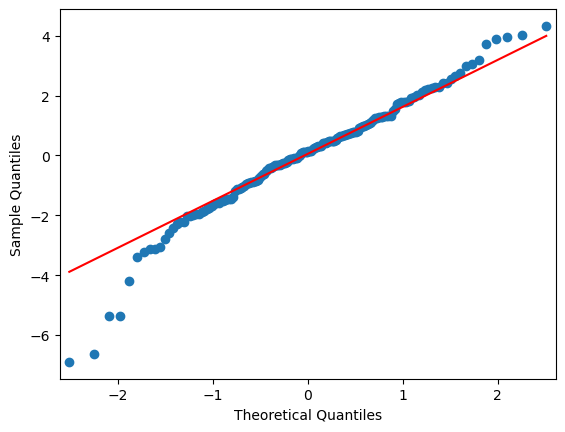

In [201]:
model_resid = sm.qqplot(model_1.resid , line = 'q')

In [202]:
def get_standardized_values(vals):
    return(vals - vals.min())/vals.std()

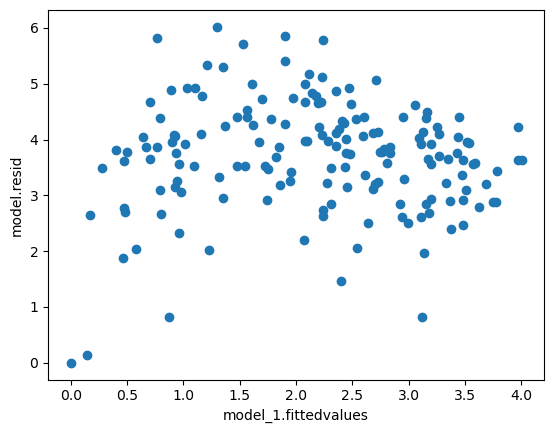

In [203]:
plt.scatter(get_standardized_values(model_1.fittedvalues), get_standardized_values(model_1.resid))
plt.xlabel('model_1.fittedvalues')
plt.ylabel('model.resid')
plt.show()

In [204]:
model_1_influence = model_1.get_influence()
(c,_) = model_1_influence.cooks_distance

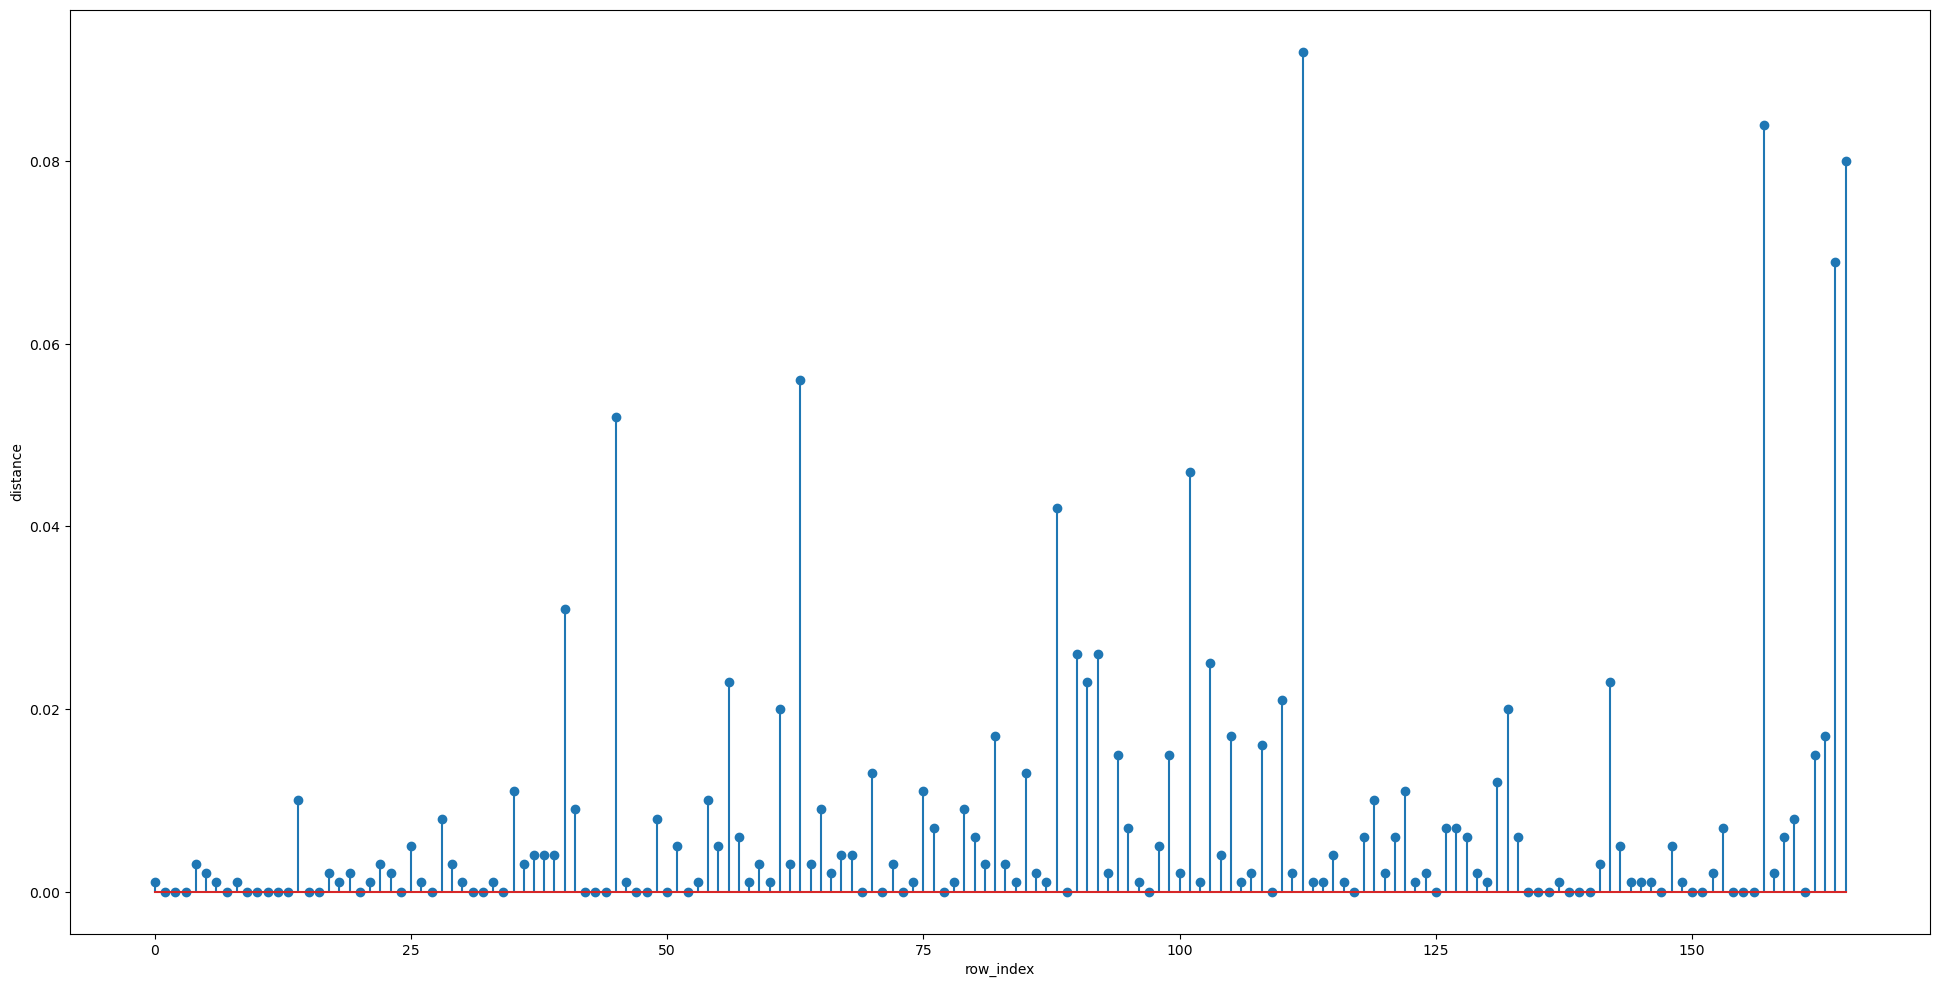

In [205]:
plt.figure(figsize = (24,12))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('row_index')
plt.ylabel('distance')
plt.show()

In [209]:
quartile1 , quartile3 = np.percentile(data['overall_score'],[25,75])


In [210]:
print(quartile1 , quartile3)

60.5474879825 74.94751070000001


In [211]:
iqr_value = quartile3-quartile1

In [212]:
iqr_value

14.400022717500008

In [216]:
lower_bound = quartile1-(1.5*iqr_value)

In [217]:
lower_bound

38.94745390624999

In [218]:
upper_bound = quartile3+(1.5*iqr_value)

In [219]:
upper_bound

96.54754477625002

<Axes: >

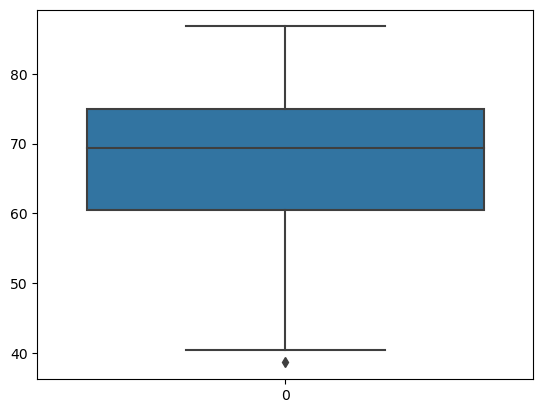

In [237]:
sn.boxplot(data['overall_score'])

<Axes: >

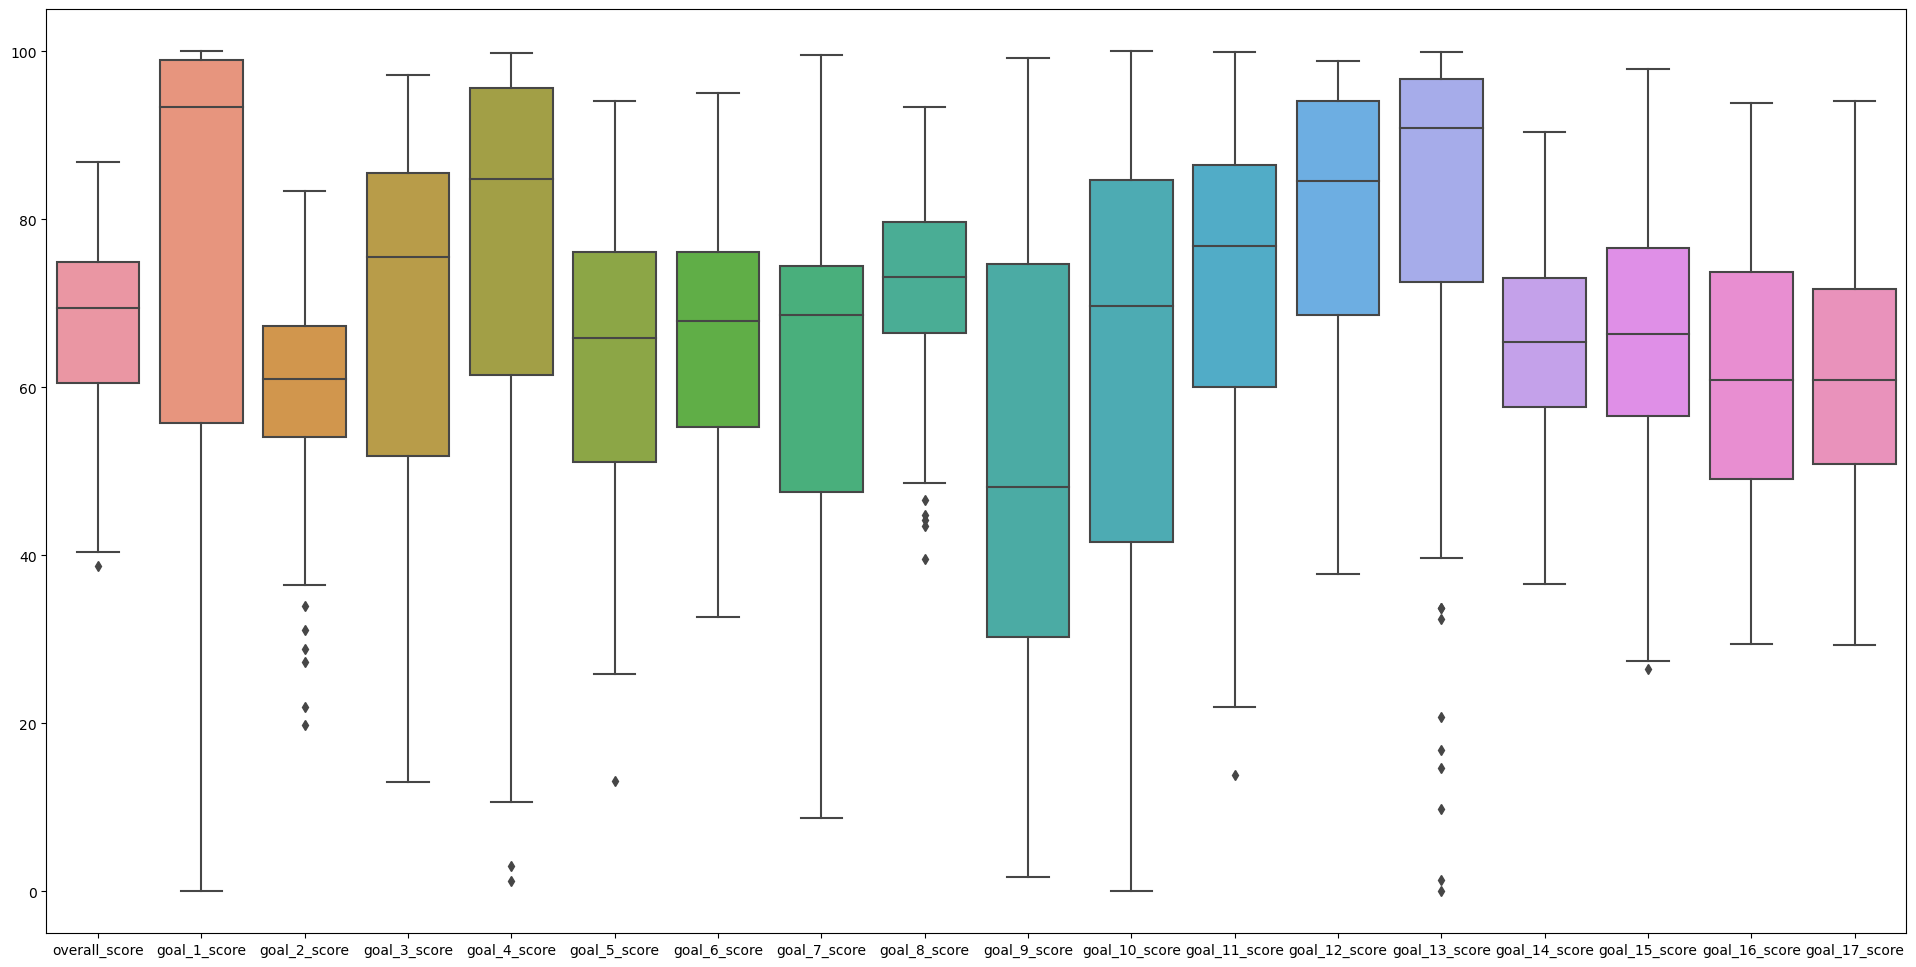

In [239]:
plt.figure(figsize = (24,12))
sn.boxplot(data)

In [240]:
## Removal of outliers from the overall_score variable

In [242]:
data = data[~((data.overall_score<(quartile1-1.5*iqr_value))| (data.overall_score>(quartile3+1.5*iqr_value)))]

In [244]:
data

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,FIN,Finland,OECD,86.760595,99.5750,60.886750,95.386385,97.169333,92.11125,94.3276,...,86.789000,95.995714,98.4685,91.233750,60.059571,68.793667,87.928000,85.0700,92.521091,75.601000
1,SWE,Sweden,OECD,85.981397,98.8885,63.074125,96.904000,99.761667,91.44025,95.0576,...,84.966429,97.586286,94.9650,90.389250,56.830571,70.031000,69.348667,80.1882,88.508455,85.770250
2,DNK,Denmark,OECD,85.683637,99.2155,71.025250,95.398500,99.339667,86.99800,90.7316,...,87.562429,96.984857,98.1560,93.038500,44.571714,60.780667,76.303333,92.7924,93.844909,82.148000
3,DEU,Germany,OECD,83.358447,99.5105,72.366000,93.039357,97.162667,81.92025,88.4434,...,86.967286,95.788429,88.1470,90.096500,55.412857,64.002000,73.996000,79.2318,89.457545,84.390250
4,AUT,Austria,OECD,82.280189,99.4510,73.067500,92.468000,97.914333,84.57925,92.1636,...,83.274143,96.982143,94.6345,92.473667,49.623286,57.332000,NaN,73.5836,87.911455,71.130250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NER,Niger,Sub-Saharan Africa,48.309761,12.8375,45.261143,37.605857,3.028000,43.66275,43.3068,...,67.579714,11.280429,63.1655,46.184500,96.212833,99.492333,NaN,73.7910,48.968727,51.651750
161,SOM,Somalia,Sub-Saharan Africa,48.027231,11.2740,27.306833,17.860923,55.639000,25.86100,49.3006,...,55.669500,5.599857,73.8030,69.417667,94.129000,99.925333,50.251200,53.3714,40.012200,43.725667
162,YEM,"Yemen, Rep.",MENA,46.846980,4.5525,28.769714,44.467429,41.766750,13.05475,36.2314,...,53.237800,14.223714,66.2925,52.952750,95.959143,98.667000,74.936667,48.3705,35.905714,50.094333
163,TCD,Chad,Sub-Saharan Africa,45.342321,25.4270,38.534714,27.061071,13.307750,30.83550,42.4036,...,64.424333,9.631571,63.0405,32.822250,90.994167,99.079000,NaN,76.1944,29.438000,52.594000


<Axes: >

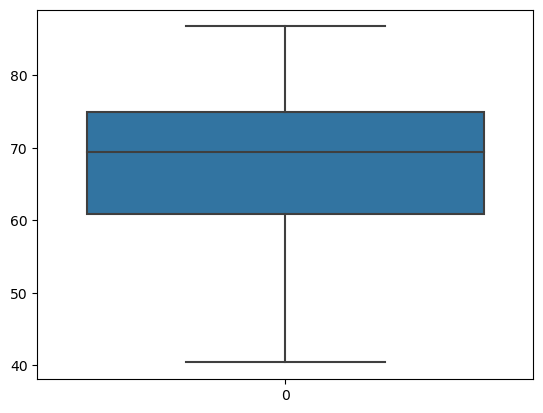

In [245]:
sn.boxplot(data['overall_score'])